In [ ]:
install.packages("gee") 

Load Data

In [98]:
library(lme4)
library(lmerTest)
library(gee)
path <- "E:/Quanitifying EMG/Summary-Spinal Loads.csv"
data <- read.csv(path)
# data
data$Decade <- factor(data$Decade)
data$Age.Group <- factor(data$Age.Group)
data$Subject <- factor(data$Subject)


In [99]:
# Filter trials
data <- subset(data, Trial.Name=="Sagital Motion")
head(data, n = 5)

,Project,Subject,Sex,Weight,BMI,Age,Age.Group,Age.Group2,Decade,Status,⋯,InferiorResultantbyMoment,SuperiorResultantbyMoment,InferiorCompressionbyBMI,SuperiorCompressionbyBMI,InferiorAnteriorPosteriorShearbyBMI,SuperiorAnteriorPosteriorShearbyBMI,InferiorLateralShearbyBMI,SuperiorLateralShearbyBMI,InferiorResultantbyBMI,SuperiorResultantbyBMI
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<int>,<fct>,<chr>,<fct>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,2023LBPEMG,10,MALE,91.5,27.75,67,60+,65+,60s,Low Back Pain Patient,⋯,20.84826,20.84826,80.57371,83.01948,20.116853,7.726353,2.388546,2.067422,83.05727,83.05727
32,2023LBPEMG,10,MALE,91.5,27.75,67,60+,65+,60s,Low Back Pain Patient,⋯,20.09829,20.09829,81.95983,83.58742,17.085265,10.151495,1.409838,2.283857,83.72169,83.72169
33,2023LBPEMG,10,MALE,91.5,27.75,67,60+,65+,60s,Low Back Pain Patient,⋯,18.51799,18.51799,83.39006,83.10150,8.309348,12.684990,1.706308,2.531243,83.75903,83.75903
34,2023LBPEMG,10,MALE,91.5,27.75,67,60+,65+,60s,Low Back Pain Patient,⋯,17.13079,17.13079,83.56601,82.37631,2.342297,15.267709,3.155098,3.365340,83.60097,83.60097
35,2023LBPEMG,10,MALE,91.5,27.75,67,60+,65+,60s,Low Back Pain Patient,⋯,16.44032,16.44032,81.27997,81.49702,14.353142,13.640913,5.650624,5.659103,82.58147,82.58147


In [102]:
response_vars <- c("SuperiorResultant", "SuperiorResultantbyMoment", "SuperiorResultantbyBMI")

for (response in response_vars) {
  cat("\nFitting model for:", response, "\n")
  formula <- as.formula(paste(response, "~ Sex + Status + Decade + Decade*Status + Sex*Status + Sex*Decade + (1 | Subject)"))
  model <- lmer(formula, data = data)
  anova_results <- anova(model)
  print(anova_results)
}



Fitting model for: SuperiorResultant 
Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq Mean Sq NumDF DenDF F value  Pr(>F)  
Sex             5317  5316.5     1    29  1.8159 0.18824  
Status          1655  1655.3     1    29  0.5654 0.45816  
Decade         18485  3696.9     5    29  1.2627 0.30649  
Status:Decade  19075  3814.9     5    29  1.3030 0.29001  
Sex:Status      1632  1632.2     1    29  0.5575 0.46128  
Sex:Decade     50060 10012.0     5    29  3.4197 0.01501 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Fitting model for: SuperiorResultantbyMoment 
Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
Sex           468.63  468.63     1    29 30.4458 6.023e-06 ***
Status         11.10   11.10     1    29  0.7210  0.402775    
Decade        904.10  180.82     5    29 11.7475 2.883e-06 ***
Status:Decade  28.20    5.64     5    29  0.3664  0.86

In [104]:
# Load necessary libraries
library(lme4)
library(gridExtra)
library(ggplot2)

# Define response variables
response_vars <- c("SuperiorResultant", "SuperiorResultantbyMoment", "SuperiorResultantbyBMI")

# Loop through each response variable
for (response in response_vars) {
  cat("\nFitting model for:", response, "\n")
  
  # Fit the model
  formula <- as.formula(paste(response, "~ Sex + Status + Decade + Decade*Status + Sex*Status + Sex*Decade + (1 | Subject)"))
  model <- lmer(formula, data = data)
  
  # Perform ANOVA
  anova_results <- anova(model)
  
  # Round the numbers in the ANOVA table
  anova_results_rounded <- round(anova_results, 3)
  
  # Add a column to indicate significance (e.g., p < 0.05)
  anova_results_rounded$Significance <- ifelse(anova_results_rounded$`Pr(>F)` < 0.05, "Yes", "No")
  
  # Convert the ANOVA results to a table grob
  table_grob <- tableGrob(anova_results_rounded)
  
  # Save the table as an image
  file_name <- paste0("anova_results_", response, ".png")
  ggsave(file_name, table_grob, width = 10, height = 6, dpi = 300)
  
  cat("Saved ANOVA results for", response, "as", file_name, "\n")
}


Fitting model for: SuperiorResultant 
Saved ANOVA results for SuperiorResultant as anova_results_SuperiorResultant.png 

Fitting model for: SuperiorResultantbyMoment 
Saved ANOVA results for SuperiorResultantbyMoment as anova_results_SuperiorResultantbyMoment.png 

Fitting model for: SuperiorResultantbyBMI 
Saved ANOVA results for SuperiorResultantbyBMI as anova_results_SuperiorResultantbyBMI.png 


* Post-Hoc Analysis

In [ ]:
library(emmeans)

# Pairwise comparisons
emmeans_results <- emmeans(model, ~ Status * Sex * Decade)
pairs(emmeans_results)


Normality of Residuals

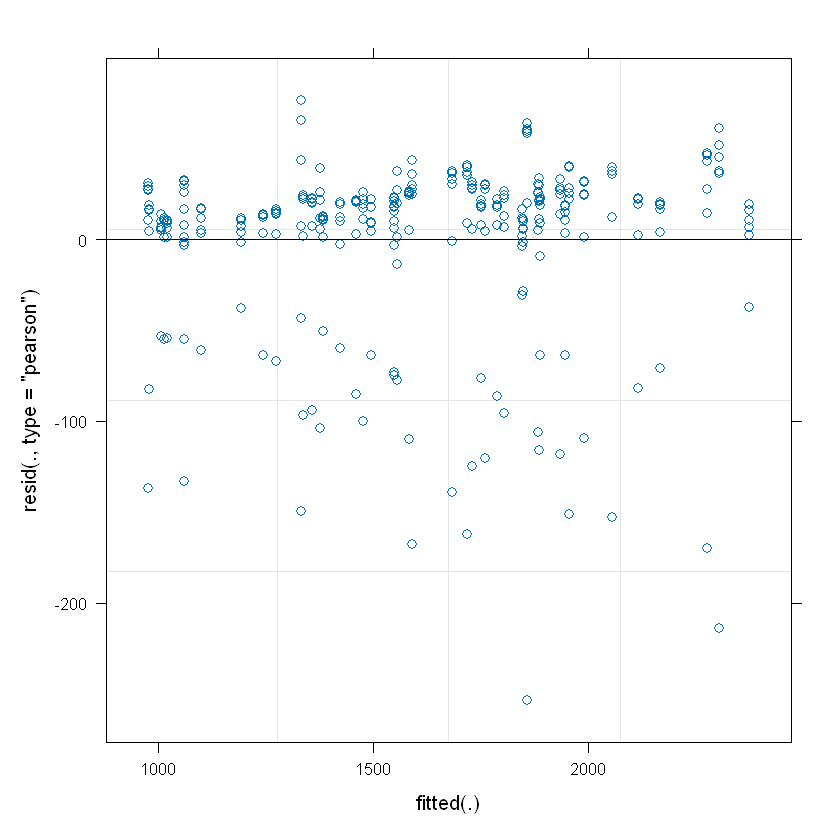

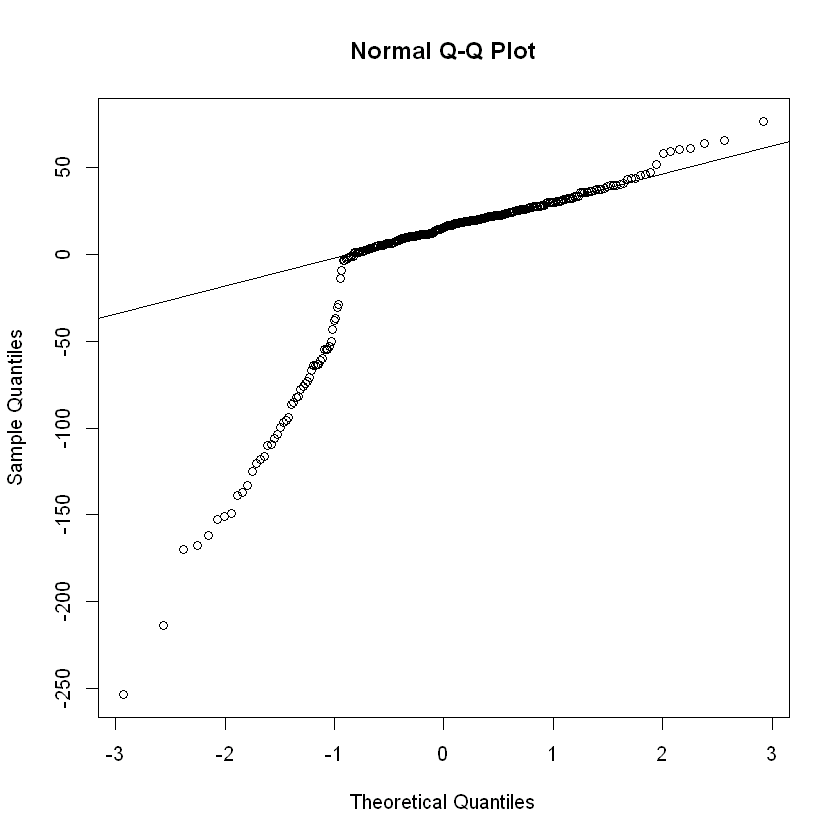

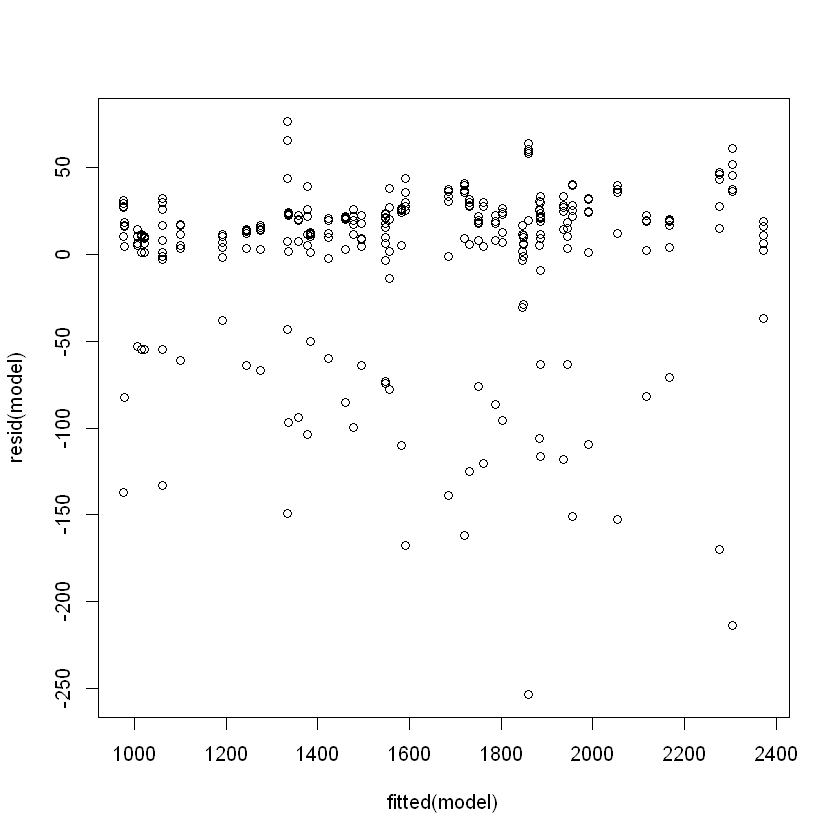

In [23]:
plot(model)
qqnorm(resid(model))
qqline(resid(model))
plot(fitted(model), resid(model))
